In [11]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from time import time
import os
from os.path import join
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from utils.mcmc_rust import utils, dm
from utils import style
from tqdm import tqdm

In [73]:
data_dir = join(parent_dir, 'Data')
data_dir

'/home2/s20321005/Thesis-Project/Data'

In [74]:
mcmc_dir = join(data_dir, 'MCMC-rust')
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-rust'

In [63]:
from glob import glob
z_files = glob(join(data_dir, "Effective-Volume-v", "*.hdf5"))
v_files = glob(join(data_dir, "Velocity-Distribution-v", "gaia*.hdf5"))
params_file = join(data_dir, "Velocity-Distribution-v", "params.hdf5")
z_files.sort()
v_files.sort()
z_files, v_files, params_file

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(-0.10)_(0.04).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.04)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.10)_(0.14).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.14)_(0.18).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.18)_(0.21).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.21)_(0.24).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.24)_(0.27).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.27)_(0.29).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.29)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume-v/gaia_

In [5]:
style("seaborn-bright", tex=True)

In [38]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [-2.3]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw = [1.5]
log_a = [-0.5]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0+ log_sigmaw + log_a]).flatten()
theta.shape

(31,)

In [7]:
ndim = 31
nwalkers = 2*ndim+2
nsteps = 10

In [61]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=-4,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw=0,
    log_a=-1.5
)

scales = dict(
    rhoDM=0.08,
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw=3,
    log_a=1.5
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('log_nu0', -4.0, -2.3, -2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 0.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 0.0, 1.5, 3.0),
 ('log_a', -1.5, -0.5, 0.0)]

In [62]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=1)
p0.shape

(64, 31)

In [64]:
import vaex

index = 1

zdata = vaex.open(z_files[index])
zdata
# zdata = np.loadtxt('data/z1.csv', skiprows=1, delimiter=',')
zmid = zdata['z'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['err'].to_numpy()
znum, zerr = znum/np.sum(znum), zerr/np.sum(znum)

wdata = vaex.open(v_files[index])
wmid = wdata['w'].to_numpy()
wnum = wdata['num'].to_numpy()
werr = wdata['err'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [65]:
dm.log_prob(p0, zdata, wdata, locs, scales)

(array([52.69581879, 50.93091138, 40.88506463, 49.56767664, 48.45050715,
        46.16219565, 52.79734752, 46.53007606, 50.77389545, 50.05074074,
        52.94015563, 56.49137837, 45.04271853, 46.51559842, 54.95542137,
        51.35278304, 56.09824835, 50.26197535, 51.83232744, 51.08498132,
        48.78338043, 50.61386912, 49.88979229, 51.57886998, 48.95997685,
        46.2902862 , 49.52964889, 36.83733864, 49.21641625, 53.41205966,
        48.53114333, 52.61902364, 51.87573865, 52.20697871, 52.53462606,
        51.98770152, 47.52289891, 46.98958326, 50.1642471 , 45.95713889,
        57.12325834, 52.93541018, 44.12158514, 52.76382575, 49.02574646,
        53.07134268, 54.4082945 , 46.77686317, 52.25727381, 51.55834471,
        51.82345722, 52.17157486, 47.98437532, 50.3211561 , 55.57747377,
        45.75587555, 43.8080953 , 44.57257602, 49.23599443, 48.47335974,
        53.12450547, 48.44978073, 51.8856    , 51.22260514]),
 array([ -399.17680032,  -285.60793084,  -215.66738011, -1791.

(31,)


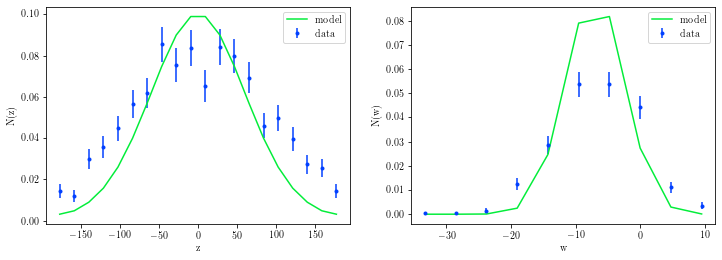

(array([62.1057877]), array([58.67835395]))

In [66]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

In [67]:
t0 = time()
sampler = dm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

40.03539991378784 s


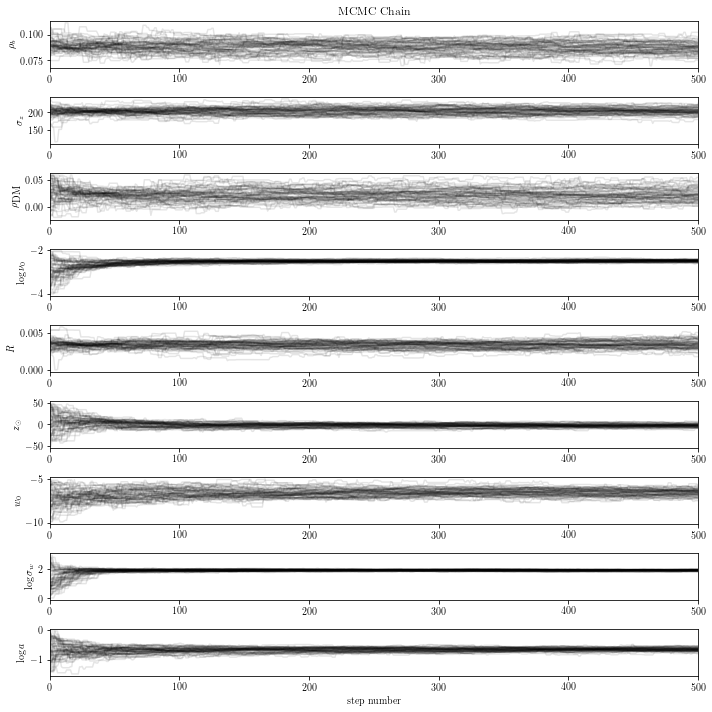

In [68]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_chain(params, labels)

In [69]:
p0_next = chain[-1, :, :]
t0 = time()
sampler = dm.run_mcmc(1000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

80.4245982170105 s


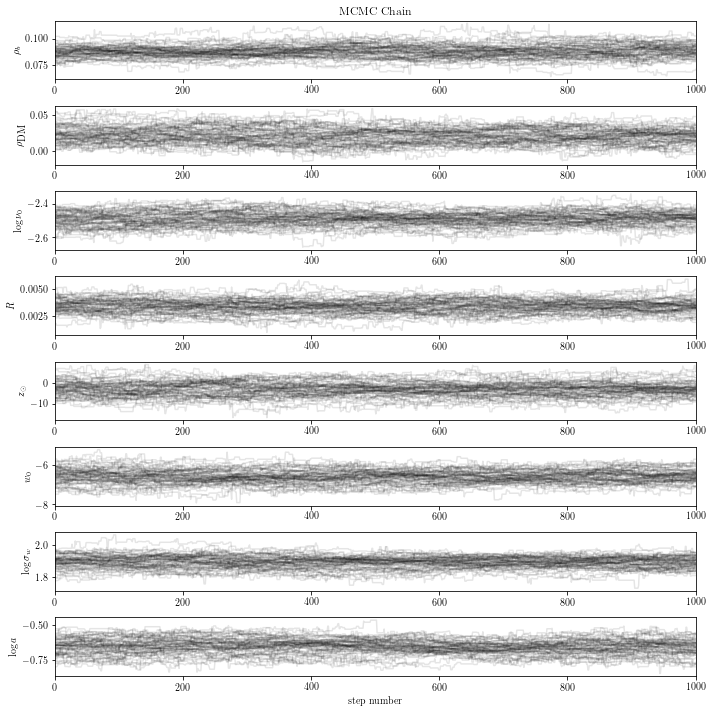

In [70]:
rhob = chain[:, :, :12].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = labels = [r'$\rho_b$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_chain(params, labels)

plot corners...
8.77632212638855 s


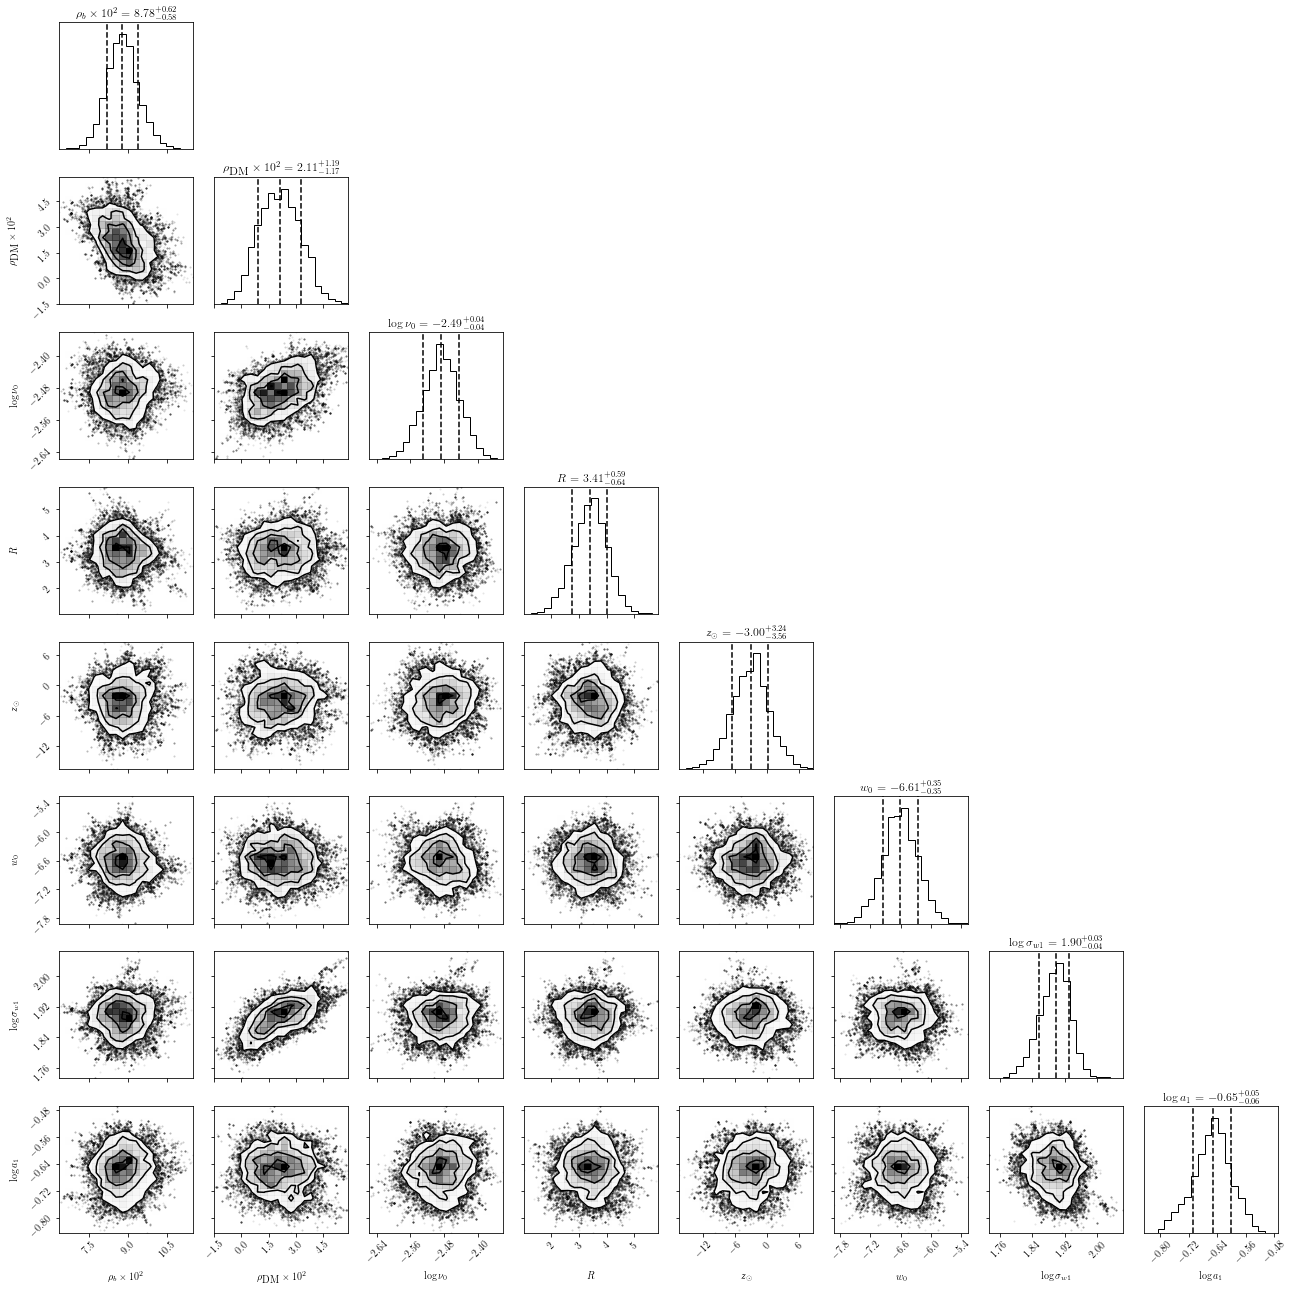

In [71]:
rhob =  chain[1:, :, :12].sum(axis=2).T/1E-2
rhoDM = chain[1:, :, 24].T/1E-2
nu0 = chain[1:, :, 25].T
R = chain[1:, :, 26].T/1E-3
zsun = chain[1:, :, 27].T
w0 = chain[1:, :, 28].T
log_sigmaw1 = chain[1:, :, 29].T
log_a1 = chain[1:, :, 30].T

params = [rhob, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1]

params = np.stack(params).T
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$']
print("plot corners...")
t0 = time()
utils.plot_corner(params, labels)
print(time() - t0, "s")

plot fit curve...


100%|██████████| 50000/50000 [00:34<00:00, 1431.48it/s]


plotting took 35.60 seconds
BIC = -303.2889770111062


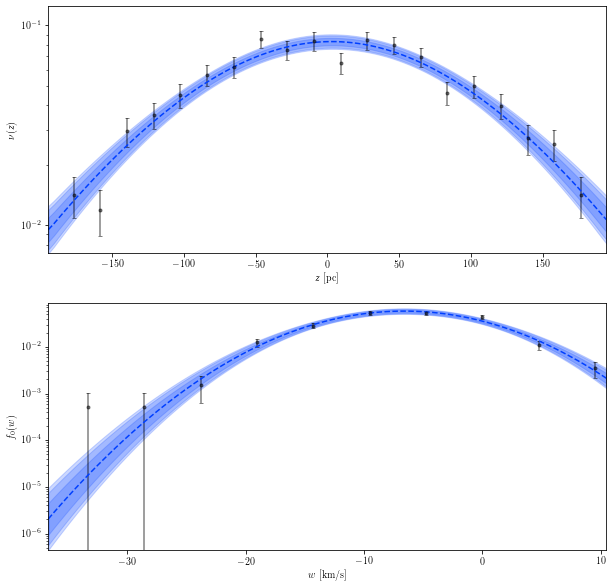

In [72]:
print("plot fit curve...")
t0 = time()
utils.plot_fit(dm, zdata, wdata, chain, ndim)
print(f'plotting took {time()-t0:.2f} seconds')

BIC = -2*np.max(probs[:, 1]) + ndim*np.log(len(zdata)+len(wdata))
print(f'BIC = {BIC}')